## Philippine Food Prices

## Part 0. Data ingest
Along with my submission, there is a CSV file: 

* Philippine Food Prices Data by the World Food Programme Database [wfp_food_prices_phl.csv] 

The code cells below will (1) mount your Google Drive and (2) load these CSV files from your Google Drive folder.

When you run the cell below, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Define the directory path to the location of the file, i.e. if it is in a folder named "UP DSSoc" under My Drive, then the file path will be "/content/drive/My Drive/UP DSSoc". Change the string variable in the code cell below, as needed:

In [2]:
file_path = "/content/drive/My Drive/UP DSSoc/DS 101/"

Now, we can load the file using **pandas read_csv** function below.

In [3]:
import numpy as np
import pandas as pd

df1 = pd.read_csv(file_path + 'wfp_food_prices_phl.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,5,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## PART 1. Data Preparation

Let's see what does the dataframe look like. Printing out the first couple of rows.

In [4]:
df1.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,Maize flour (yellow),KG,actual,Retail,PHP,15.0,0.2623
2,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Retail,PHP,20.0,0.3498
3,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Wholesale,PHP,18.35,0.3209
4,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,18.0,0.3148


We can now see that this is a time-series data, with geospatial coordinates. Therefore, we can also employ GeoPandas module for this.


But first, we can with the prices of the most staple food for Filipinos, that is, **Rice**. We must search for Rice prices in the *commodity* column. And naively,  ascribe a logical condition if the given string therein, contains the keyword 'Rice'. 


However, we will get an empty Data Frame, as the program would only find rows with the exact string 'Rice' as a commodity. Contrary to what we see in the data itself that it takes on many forms. May be it 'Rice (milled, superior)', 'Rice (regular, milled)', 'Rice (special)' and others that we might not see. 


It would be tedious to search for these phrases altogether. And there can be forms of 'Rice' in the column that's hidden from us, compromising our inference.


In [5]:
df1[df1['commodity'] == 'Rice']

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice


The more rational thing to do is to use the str.contains function, in place of the logical condition. As this scrutinizes the data for any rows that contain the keyword, 'Rice'.

We now call this new data frame, **Rice_Prices**

In [6]:
Rice_Prices = df1[ df1['commodity'].str.contains("Rice") ]

Rice_Prices

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
2,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Retail,PHP,20.0,0.3498
3,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Wholesale,PHP,18.35,0.3209
4,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,18.0,0.3148
5,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Wholesale,PHP,16.35,0.2859
7,2000-01-15,Region III,Nueva Ecija,Palayan,15.5415,121.0848,cereals and tubers,"Rice (milled, superior)",KG,actual,Retail,PHP,19.0,0.3323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107330,2022-03-15,Region XIII,Surigao del Norte,Surigao del Norte,9.789983,125.495822,cereals and tubers,Rice (special),KG,actual,Retail,PHP,45.65,0.7983
107331,2022-03-15,Region XIII,Surigao del Norte,Surigao del Norte,9.789983,125.495822,cereals and tubers,Rice (well milled),KG,actual,Retail,PHP,39.7,0.6943
107363,2022-03-15,Region XIII,Surigao del Sur,Surigao del Sur,9.056504,126.196915,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,37.51,0.656
107364,2022-03-15,Region XIII,Surigao del Sur,Surigao del Sur,9.056504,126.196915,cereals and tubers,Rice (special),KG,actual,Retail,PHP,43.57,0.7619


Next thing we can do (using the new data frame), is to isolate the prices from a single location only. 

Here, we'll take the capital Metro Manila. SInce we're fairly sure that it is the only form of that name, as it is a proper noun, we can now use our logical condition. It is also helpful to remember that the string we find for is also Case and Character sensitive, so put the exact syntax.

We call this data frame, **Rice_Prices_Manila**

In [7]:
Rice_Prices_Manila = Rice_Prices[ Rice_Prices['market'] == "Metro Manila"]
Rice_Prices_Manila

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
2,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Retail,PHP,20.0,0.3498
3,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Wholesale,PHP,18.35,0.3209
4,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,18.0,0.3148
5,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Wholesale,PHP,16.35,0.2859
39,2000-02-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Retail,PHP,20.0,0.3498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102644,2022-02-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,Rice (special),KG,actual,Retail,PHP,52.83,0.9239
102645,2022-02-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,Rice (well milled),KG,actual,Retail,PHP,42.84,0.7492
105162,2022-03-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,38.86,0.6796
105163,2022-03-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,Rice (special),KG,actual,Retail,PHP,52.68,0.9213


From this, we can plot the Rice's price fluctutations in Metro Manila from 2000-2022 using matplotlib.

But before plotting, we need to ensure that the datastamps are converted into datetype64, and float64 suitable for numpy operations. We also have to separate, wholesale and retail prices as they are different on the same time

---



In [14]:
Rice_Prices_Manila_Wholesale = Rice_Prices_Manila[ Rice_Prices_Manila['pricetype'] == "Wholesale"]

Rice_Prices_Manila_Retail = Rice_Prices_Manila[ Rice_Prices_Manila['pricetype'] == "Retail"]

Now subsetting for two types of sales of Rice in Manila

In [15]:
from matplotlib import pyplot as plt

date1 = Rice_Prices_Manila_Retail['date']
price1 = Rice_Prices_Manila_Retail['price']

date2 = Rice_Prices_Manila_Wholesale['date']
price2 = Rice_Prices_Manila_Wholesale['price']


date1 = pd.to_datetime( date1 )
price1 = price1.astype(float)

date2 = pd.to_datetime( date2 )
price2 = price2.astype(float)
# I could've done this on the original dataset, so I wouldn't have to reiterate it per pricetype, but this exact method begets an error there.

# Optional
rice1 = pd.merge(date1, price1, right_index = True, left_index = True)
rice2 = pd.merge(date2, price2, right_index = True, left_index = True)

Plotting the retail price of rice in Metro Manila from 2000-2022

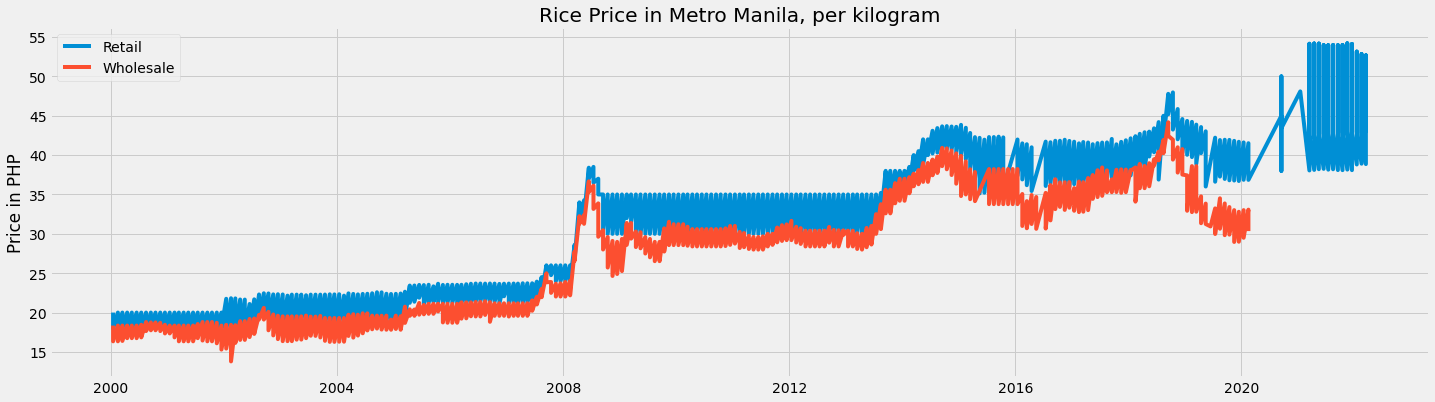

In [16]:
plt.style.use("fivethirtyeight")

plt.figure(figsize=(22, 6))

plt.plot(date1, price1, label= 'Retail')
plt.plot(date2, price2, label= 'Wholesale')

plt.ylabel('Price in PHP')
plt.title('Rice Price in Metro Manila, per kilogram')
plt.legend()

Now we can see the upward trend of the Rice prices in Metro Manila from 2000-2022. This is from steady inflation that is a mark of a growing economy.

However, another notable thing is the changes since the pandemic. Not only did the price per kilogram significantly jumped, it had wildly fluctuated. This is a daunting challenge for the common Filipino, especially the poor. This greatly compromises the country's food security